In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as splt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score,classification_report,f1_score


In [196]:
df=pd.read_csv('/content/cardio_train_70000.csv',sep=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [197]:
df.shape

(70000, 13)

In [198]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


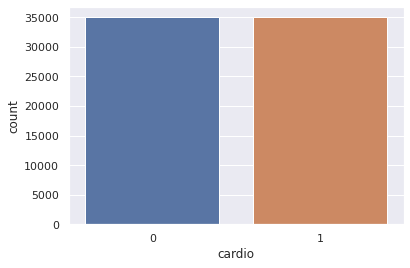

In [199]:
sns.countplot(df['cardio'])

In [200]:
df.isnull().values.any()

False

In [201]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [202]:
df['age']= df['age']/365
df['age']= df['age'].astype(int)

In [203]:
Q1_age=df.age.quantile(0.25)
Q3_age=df.age.quantile(0.75)
Q1_age,Q3_age

(48.0, 58.0)

In [204]:
IQR_age=Q3_age-Q1_age
IQR_age

10.0

In [205]:
lower_limit_age=Q1_age-1.5*IQR_age
upper_limit_age=Q1_age+1.5*IQR_age
lower_limit_age,upper_limit_age

(33.0, 63.0)

In [206]:

outlier = ((df["age"]<33) | (df["age"]>63)  | (df["ap_hi"]<=80) | (df["ap_hi"]>200)  
          | (df["ap_lo"]<50) | (df["ap_lo"]>150)  )
print("There is {} outlier".format(df[outlier]["cardio"].count()))

There is 3570 outlier


In [207]:
df = df[~outlier]

In [208]:
df 

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [209]:
df['bmi'] = (df['weight'] / (((df['height']/100)**2))).round(decimals=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [210]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.97
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.93
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.51
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.71
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0,26.93
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,1,50.47
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1,31.35
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1,27.10


In [211]:
df['AgeBand'] = pd.cut(df['age'], 3)
print (df[['AgeBand', 'cardio']].groupby(['AgeBand'], as_index=False).mean())

          AgeBand    cardio
0  (38.976, 47.0]  0.341986
1    (47.0, 55.0]  0.466554
2    (55.0, 63.0]  0.605225


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [212]:
def binningFunction(col, cut_points,labels=None):
  minval=col.min()
  maxval=col.max()
  break_points=[minval]+cut_points+[maxval]
  print(break_points)
  if not labels:
    labels=range(len(cut_oints)+1)
  colSin=pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colSin

In [213]:
cut_points=[47,55]
labels=["age1","age2","age3"]
df["age"]=binningFunction(df["age"],cut_points,labels)

[39, 47, 55, 63]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [214]:
cut_points=[80,90,120]
labels=["normal","high1","high2","emergency"]
df["ap_lo"]=binningFunction(df["ap_lo"],cut_points,labels)

[50, 80, 90, 120, 150]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [215]:
cut_points=[130,140,180]
labels=["normal","high1","high2","emergency"]
df["ap_hi"]=binningFunction(df["ap_hi"],cut_points,labels)

[85, 130, 140, 180, 200]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [216]:
cut_points=[18.5,24.9,29.9,34.9,40]
labels=["Underweight","Normal Weight","Overweight","Obesity1","Obesity2","Obesity3"]
df["bmi"]=binningFunction(df["bmi"],cut_points,labels)

[3.47, 18.5, 24.9, 29.9, 34.9, 40, 298.67]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [217]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,AgeBand
0,0,age2,2,168,62.0,normal,normal,1,1,0,0,1,0,Normal Weight,"(47.0, 55.0]"
1,1,age2,1,156,85.0,high1,high1,3,1,0,0,1,1,Obesity2,"(47.0, 55.0]"
2,2,age2,1,165,64.0,normal,normal,3,1,0,0,0,1,Normal Weight,"(47.0, 55.0]"
3,3,age2,2,169,82.0,high2,high2,1,1,0,0,1,1,Overweight,"(47.0, 55.0]"
4,4,age1,1,156,56.0,normal,normal,1,1,0,0,0,0,Normal Weight,"(38.976, 47.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,age2,2,168,76.0,normal,normal,1,1,1,0,1,0,Overweight,"(47.0, 55.0]"
69996,99995,age3,1,158,126.0,high1,high1,2,2,0,0,1,1,Obesity3,"(55.0, 63.0]"
69997,99996,age2,2,183,105.0,high2,high1,3,1,0,1,0,1,Obesity1,"(47.0, 55.0]"
69998,99998,age3,1,163,72.0,high1,normal,1,2,0,0,0,1,Overweight,"(55.0, 63.0]"


In [218]:
df['age']=pd.factorize(df.age)[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [219]:
df['ap_lo']=pd.factorize(df.ap_lo)[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [220]:
df['ap_hi']=pd.factorize(df.ap_hi)[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [221]:
df['bmi']=pd.factorize(df.bmi)[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [222]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,AgeBand
0,0,0,2,168,62.0,0,0,1,1,0,0,1,0,0,"(47.0, 55.0]"
1,1,0,1,156,85.0,1,1,3,1,0,0,1,1,1,"(47.0, 55.0]"
2,2,0,1,165,64.0,0,0,3,1,0,0,0,1,0,"(47.0, 55.0]"
3,3,0,2,169,82.0,2,2,1,1,0,0,1,1,2,"(47.0, 55.0]"
4,4,1,1,156,56.0,0,0,1,1,0,0,0,0,0,"(38.976, 47.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,0,2,168,76.0,0,0,1,1,1,0,1,0,2,"(47.0, 55.0]"
69996,99995,2,1,158,126.0,1,1,2,2,0,0,1,1,4,"(55.0, 63.0]"
69997,99996,0,2,183,105.0,2,1,3,1,0,1,0,1,3,"(47.0, 55.0]"
69998,99998,2,1,163,72.0,1,0,1,2,0,0,0,1,2,"(55.0, 63.0]"


In [223]:
del df['id']
del df['AgeBand']
del df['height']
del df['weight']


In [224]:
df

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,2,0,0,1,1,0,0,1,0,0
1,0,1,1,1,3,1,0,0,1,1,1
2,0,1,0,0,3,1,0,0,0,1,0
3,0,2,2,2,1,1,0,0,1,1,2
4,1,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,0,2,0,0,1,1,1,0,1,0,2
69996,2,1,1,1,2,2,0,0,1,1,4
69997,0,2,2,1,3,1,0,1,0,1,3
69998,2,1,1,0,1,2,0,0,0,1,2


In [225]:
df.corr()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
age,1.000000,0.006861,0.071328,0.045667,0.090415,0.056297,-0.017730,-0.011968,-0.004731,0.118725,0.027509
gender,0.006861,1.000000,0.033605,0.043147,-0.034892,-0.021122,0.340665,0.171869,0.005900,0.008333,-0.047742
ap_hi,0.071328,0.033605,1.000000,0.685505,0.171867,0.075818,0.023345,0.031316,0.005531,0.396261,0.157453
ap_lo,0.045667,0.043147,0.685505,1.000000,0.168181,0.070013,0.027526,0.046550,0.001917,0.339551,0.164758
cholesterol,0.090415,-0.034892,0.171867,0.168181,1.000000,0.450615,0.011410,0.036918,0.007765,0.221966,0.117219
gluc,0.056297,-0.021122,0.075818,0.070013,0.450615,1.000000,-0.005034,0.010709,-0.007694,0.089978,0.077272
smoke,-0.017730,0.340665,0.023345,0.027526,0.011410,-0.005034,1.000000,0.340884,0.026673,-0.015328,-0.000947
alco,-0.011968,0.171869,0.031316,0.046550,0.036918,0.010709,0.340884,1.000000,0.025678,-0.007806,0.024302
active,-0.004731,0.005900,0.005531,0.001917,0.007765,-0.007694,0.026673,0.025678,1.000000,-0.037515,-0.002023
cardio,0.118725,0.008333,0.396261,0.339551,0.221966,0.089978,-0.015328,-0.007806,-0.037515,1.000000,0.130930


In [226]:
y = df["cardio"]
X = df.drop('cardio',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [227]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_curve, roc_auc_score

In [228]:
dtc = DecisionTreeClassifier()
ran = RandomForestClassifier(n_estimators=90)
svm = SVC(random_state=6)

In [229]:
models = {"Decision tree" : dtc,
          "Random forest" : ran,
          "SVM" : svm}
scores= { }

In [230]:
for key, value in models.items():    
    model = value
    model.fit(X_train, y_train)
    scores[key] = model.score(X_test, y_test)

In [231]:
scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_frame.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
scores_frame

,Accuracy Score
SVM,0.720683
Random forest,0.711124
Decision tree,0.704652
